<a href="https://colab.research.google.com/github/Shiwei-Chen/DESC-624/blob/master/DESC_624_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Tree**

What is Entropy?


The core algorithm for building decision trees is called ID3. Developed by J. R. Quinlan, this algorithm employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses **Entropy** and Information Gain to construct a decision tree.

**Entropy** : A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogeneous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is equally divided then it has entropy of one.

**Gini Index:**

Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.

1. It works with categorical target variable “Success” or “Failure”.
2. It performs only Binary splits
3. Higher the value of Gini higher the homogeneity.
4. CART (Classification and Regression Tree) uses Gini method to create binary splits.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
url = 'https://raw.githubusercontent.com/Shiwei-Chen/DESC-624/master/citrus.csv'
ovg = pd.read_csv(url)
ovg.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [82]:
ovg.nunique()

name           2
diameter     940
weight      6627
red           75
green         80
blue          48
dtype: int64

In [0]:
orange = ovg.loc[ovg['name'] == 'orange']
grapefruit = ovg.loc[ovg['name'] == 'grapefruit']


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


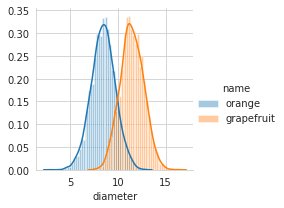

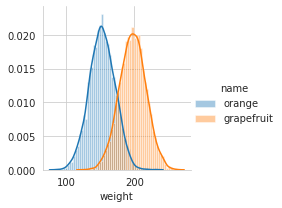

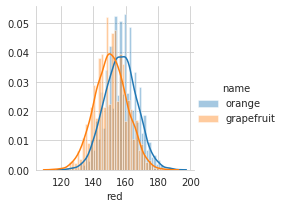

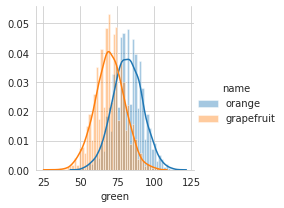

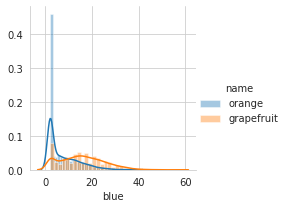

In [84]:
sns.FacetGrid(ovg,hue = 'name', size = 3).map(sns.distplot,'diameter').add_legend()
sns.FacetGrid(ovg,hue = 'name', size = 3).map(sns.distplot,'weight').add_legend()
sns.FacetGrid(ovg,hue = 'name', size = 3).map(sns.distplot,'red').add_legend()
sns.FacetGrid(ovg,hue = 'name', size = 3).map(sns.distplot,'green').add_legend()
sns.FacetGrid(ovg,hue = 'name', size = 3).map(sns.distplot,'blue').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


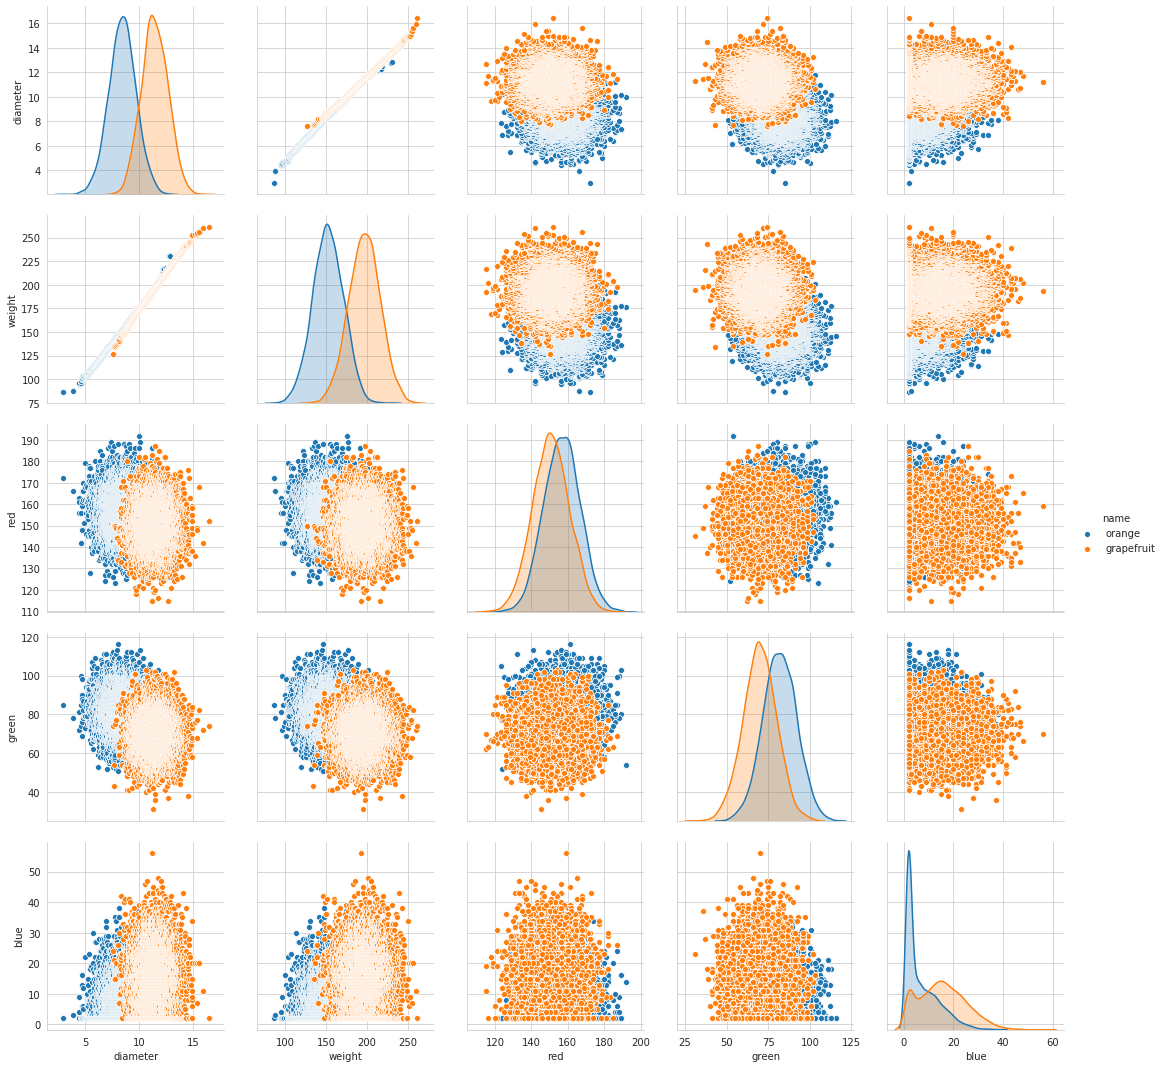

In [85]:
sns.set_style('whitegrid')
sns.pairplot(ovg,hue = 'name',size = 3);
plt.show()

**Preparing to model the data**

In [0]:
from sklearn.model_selection import train_test_split
import random

In [0]:
ovg_train, ovg_test = train_test_split(ovg, test_size = 0.25, random_state = 7)

In [88]:
ovg_train['name'].value_counts()

grapefruit    3755
orange        3745
Name: name, dtype: int64

In [0]:
#Transfer categorial into numerical value
import statsmodels.tools.tools as statstools
type_np = np.array(ovg['name'])

(type_numeric, type_numeric_dict) = statstools.categorical(type_np, dictnames = True)

In [90]:
type_numeric_dict

{1: 'grapefruit', 2: 'orange'}

**Decision Trees**

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data

In [92]:
ovg.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [0]:
X = ovg.drop(['name'], axis =1)
y = ovg['name']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [95]:
dt = DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 6)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
X_train.head()

,diameter,weight,red,green,blue
651,7.05,132.19,157,79,2
6560,10.87,188.07,155,64,7
8974,12.51,213.26,158,67,2
2348,8.39,151.27,164,99,2
5670,10.10,175.75,149,61,8


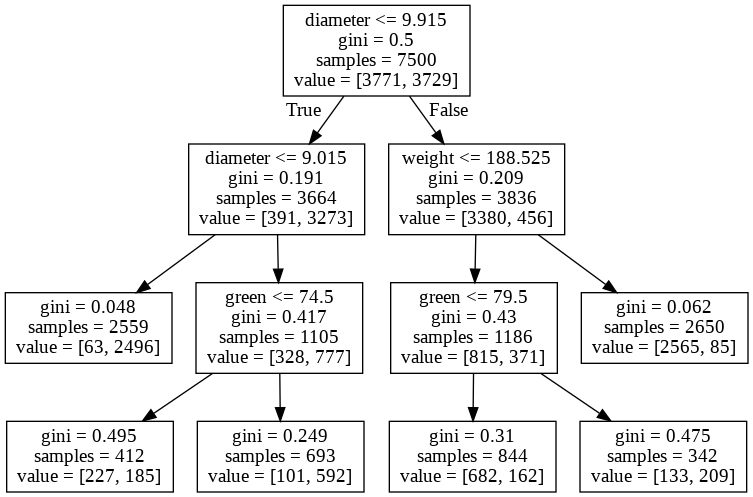

In [97]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,feature_names = X_train.columns[:5])
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Logistic Regression**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from inspect import signature

In [99]:
import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

url = 'https://raw.githubusercontent.com/Shiwei-Chen/DESC-624/master/titanic.csv'
titanic = pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [100]:
null_count = titanic.isnull().sum()
null_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
ageavg= titanic['Age'].mean()
ageavg

29.69911764705882

In [102]:
#Fill NaN in age column with average age of 29.70
titanic['Age'] = titanic['Age'].fillna(29.70)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [103]:
titanic['Sex'] = np.where(titanic['Sex']=='female','0','1')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [104]:
test = titanic.drop(['Name', 'Ticket', 'Cabin','Embarked'], axis = 1)
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,29.7,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [105]:
test['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(test.iloc[:,:30], test["Survived"], test_size=0.3, random_state=42)
print("Class Counts")
print(y_test.value_counts(), end="\n\n")
print("Class Proportions")
print(y_test.value_counts()/len(y_test))

Class Counts
0    157
1    111
Name: Survived, dtype: int64

Class Proportions
0    0.585821
1    0.414179
Name: Survived, dtype: float64


In [0]:
#Build the Logistic regression object
logisticRegr = LogisticRegression(solver='liblinear',fit_intercept=True)
#use logistic model to fit training data
logisticRegr.fit(X_train, y_train)
#generate predicted classes for test data
logis_pred = logisticRegr.predict(X_test)
#generate predicted probabilites for test data
logis_pred_prob = logisticRegr.predict_proba(X_test)

In [0]:
#Build a "dummy" classifier that predicts every observation to be the most frequent class, in this case 'no-survived')
dummy = DummyClassifier(strategy="uniform")#, constant = 1)
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)

In [109]:
print("Proportion of People Predicted as Survived (Logistic Regression) = ", logis_pred.mean())
print("Test accuracy (Logistic Regression) =", logisticRegr.score(X_test,y_test), end="\n\n")

Proportion of People Predicted as Survived (Logistic Regression) =  0.4141791044776119
Test accuracy (Logistic Regression) = 1.0



In [110]:
print("Proportion of Person Predicted as Survived (Dummy Classifer) = ", dumb_pred.mean())

print("Test accuracy (Dummy Classifier) =", dumb.score(dumb_pred,y_test))

Proportion of Person Predicted as Survived (Dummy Classifer) =  0.5373134328358209
Test accuracy (Dummy Classifier) = 0.503731343283582


In [0]:
cm_logi = confusion_matrix(y_test, logis_pred)
cm_logi_df = pd.DataFrame(cm_logi)

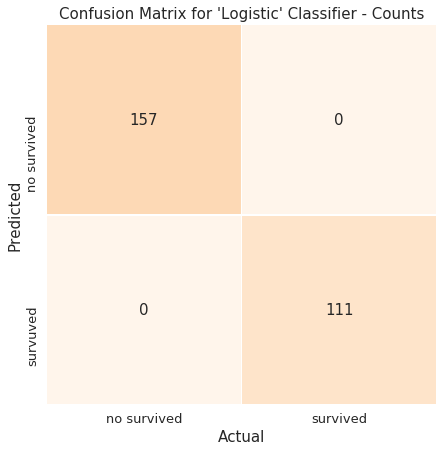

In [114]:
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_logi_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["no survived","survived"], yticklabels=["no suvived","survived"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no survived","survived"], fontsize=13)
ax.set_yticklabels(["no survived","survuved"], fontsize=13)
plt.title("Confusion Matrix for 'Logistic' Classifier - Counts", fontsize=15)
plt.show()

In [0]:
#Building Confusion matrix: Logistic - Thresh=0.5 - Counts
#generate confusion matrix for Dummy classifier
cm_dummy = confusion_matrix(y_test, dumb_pred)
#put it into a dataframe for seaborn plot function
cm_dummy_df = pd.DataFrame(cm_dummy)

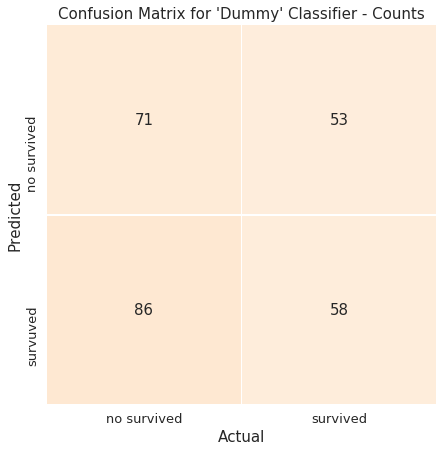

In [116]:
#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["no survived","survived"], yticklabels=["no survived","survived"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no survived","survived"], fontsize=13)
ax.set_yticklabels(["no survived","survuved"], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)
plt.show()